# LIBRARY


In [9]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

# FUNCTION

In [11]:
def boxPlot(df, kolom_awal, kolom_akhir):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.iloc[:, kolom_awal:kolom_akhir], orient='h')
    df.shape

# DATA

In [86]:
df1 = pd.read_csv('datatraining.csv')
df1

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


- Temperatur : Celcius
- Humadity : %
- Light : Lux
- CO2 : ppm
- HumadityRatio : kgwater-vapor/kg-air

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [6]:
df1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


# PRE-PROCESSING DATA

## DATA CLEANING

### Duplicate Data Handling

In [7]:
df1.duplicated().sum()

0

### Missing Value Handling


In [8]:
df1.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

### Outlier Handling

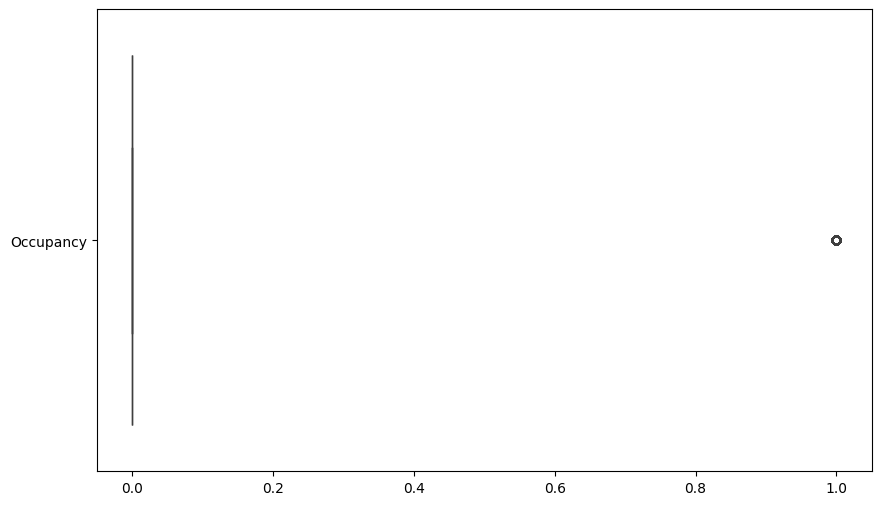

In [33]:
boxPlot(df1, 6, 7)

In [17]:
df1['Occupancy'].value_counts()

Occupancy
0    6414
1    1729
Name: count, dtype: int64

Terlihat bahwa data tidak seimbang, akan dilakukan penyeimbangan data dengan SMOT

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE(random_state=42)

In [21]:
new_X, new_Y = smote.fit_resample(df1.drop(['Occupancy','date'], axis='columns'), df1['Occupancy'])

In [25]:
df2 = pd.DataFrame(new_X, columns=df1.drop(['Occupancy', 'date'], axis='columns').columns)
df2['Occupancy'] = new_Y

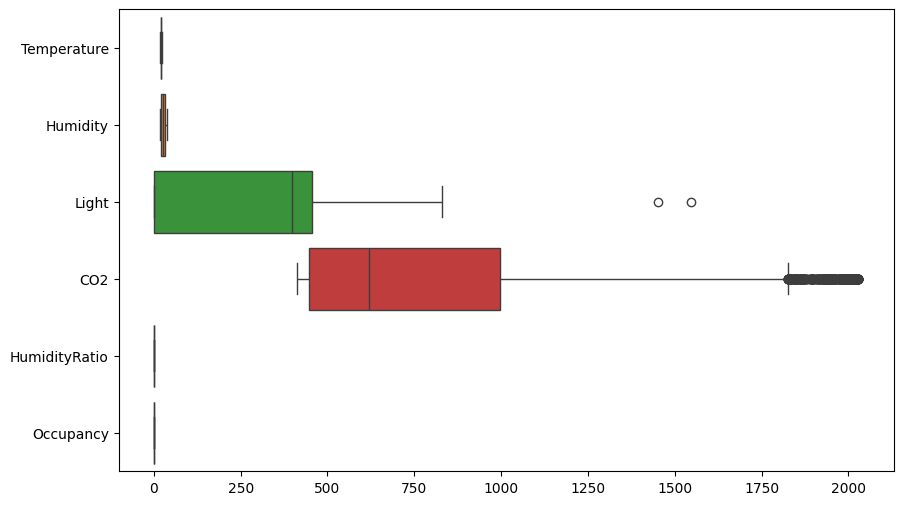

In [30]:
boxPlot(df2, 0, 7)

dapat dilihat masih terdapat outlier pada kolom 'light' dan 'CO2'

In [54]:
df3 = df2[df2['CO2'] < 1590]
df3.shape

(12163, 6)

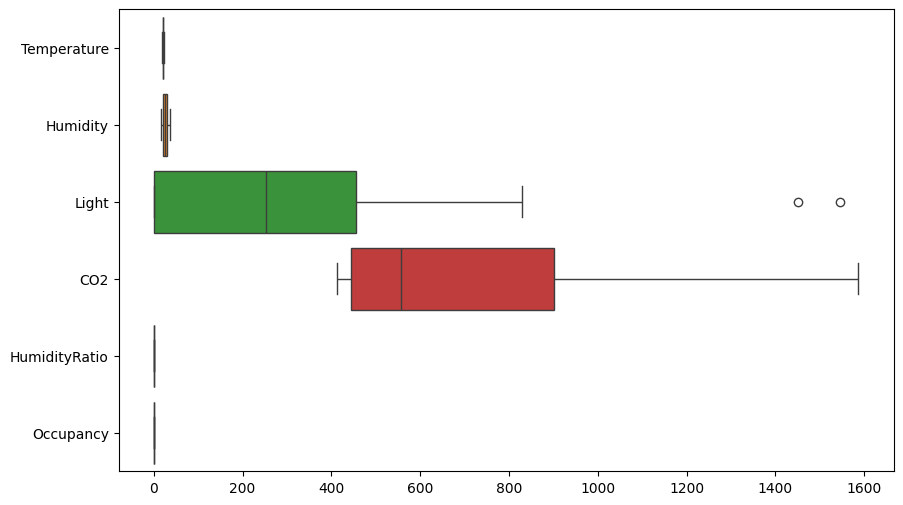

In [55]:
boxPlot(df3, 0, 7)

In [83]:
df1.loc[(df1['Light'] != 0) & (df1['Occupancy'] == 1), 'Occupancy']

1       1
2       1
3       1
4       1
5       1
       ..
8139    1
8140    1
8141    1
8142    1
8143    1
Name: Occupancy, Length: 1729, dtype: int64

In [48]:
df4 = df3[df3['Light'] < 1000]

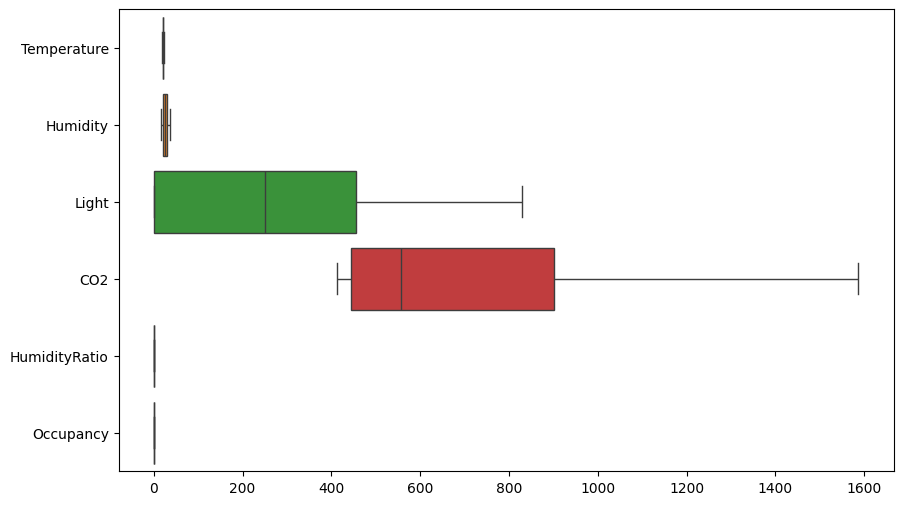

In [49]:
boxPlot(df4, 0, 7)

In [114]:
df5 = df4[df4['Light'] > 0]

Data sudah normal dan disimpan pada df

In [115]:
df = df5.copy()

# MODELING

In [116]:
X = df.drop(['Occupancy'], axis='columns')
y = df['Occupancy']

## Membagi Data Test dari Data Training

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [326]:
import sklearn.preprocessing as pp

In [327]:
scaler = pp.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [328]:
import sklearn.neural_network as nn

In [329]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(32,16), max_iter=200, activation='logistic')
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 16))

In [330]:
X_train.shape

(5616, 5)

In [340]:
y_pred = mlp.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [332]:

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       259
           1       0.98      1.00      0.99      1145

    accuracy                           0.98      1404
   macro avg       0.99      0.96      0.97      1404
weighted avg       0.98      0.98      0.98      1404



Karena pada dataset sebelumnya terjadi penambahan data dengan metode SMOTE, terlihat bahwa hasilnya seperti overfit, maka selanjutnya akan ditest menggunakan dataset yang terpisah (bukan hasil dari SMOTE)

## Menggunakan Data Test Sendiri

In [377]:
X_train = X
y_train = y
X_train.shape

(7020, 5)

In [378]:
df_test = pd.read_csv('datatest2.csv')
df_test.shape

(9752, 7)

In [379]:
X_test = df_test.drop(['date','Occupancy'], axis='columns')
y_test = df_test['Occupancy']

In [380]:
scaler = pp.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [386]:
mlp = nn.MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=200, activation='logistic')
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 16))

In [387]:
y_pred = mlp.predict(X_test)

In [388]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7703
           1       0.93      0.64      0.76      2049

    accuracy                           0.91      9752
   macro avg       0.92      0.81      0.85      9752
weighted avg       0.92      0.91      0.91      9752



Hasilnya lebih normal dari pada sebelumnya

# EXPORT WEIGHTS AS JSON

In [389]:
weights = mlp.coefs_
biases = mlp.intercepts_


list

In [400]:
import json

# Convert NumPy arrays to lists
def convert_np(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    return obj

data_dict = {"layer_" + str(i + 1): layer for i, layer in enumerate(biases)}

# Iterasi melalui setiap lapisan
for layer_index, neuron_values in enumerate(biases, start=1):
    layer_key = f"layer_{layer_index}" 
    neuron_dict = {}
    
    # Iterasi melalui setiap neuron dalam lapisan
    for neuron_index, value in enumerate(neuron_values, start=1):
        neuron_key = f"neuron_{neuron_index}"
        neuron_dict[neuron_key] = value
    
    # Tambahkan dictionary neuron ke lapisan
    data_dict[layer_key] = neuron_dict

# Tambahkan logika untuk layer terakhir
data_dict["output_layer"] = data_dict.pop(f"layer_{layer_index}")

# Save biases to a JSON file
with open('biases.json', 'w') as json_file:
    json.dump(data_dict, json_file, default=convert_np)